####Aula 9 -> Aprendizado Não Supervisionado

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [2]:
df = datasets.load_iris()
df = pd.DataFrame(data = df.data, columns = df.feature_names)
type(df['petal length (cm)'])

pandas.core.series.Series

In [3]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


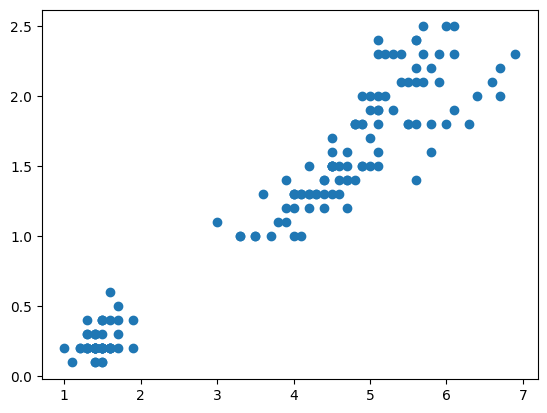

In [8]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])

###Kmeans

### achando o numero declusters

In [11]:
inercia = []
for k in range(2,11):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(df)
  inercia.append(kmeans.inertia_)

In [12]:
inercia

[152.34795176035797,
 78.85566582597727,
 57.38387326549491,
 46.44618205128204,
 39.38030324250914,
 34.84523975044561,
 32.906632607588485,
 29.362651686033264,
 26.53879082767191]

In [13]:
curve_elbow = np.diff(inercia)
curve_elbow

array([-73.49228593, -21.47179256, -10.93769121,  -7.06587881,
        -4.53506349,  -1.93860714,  -3.54398092,  -2.82386086])

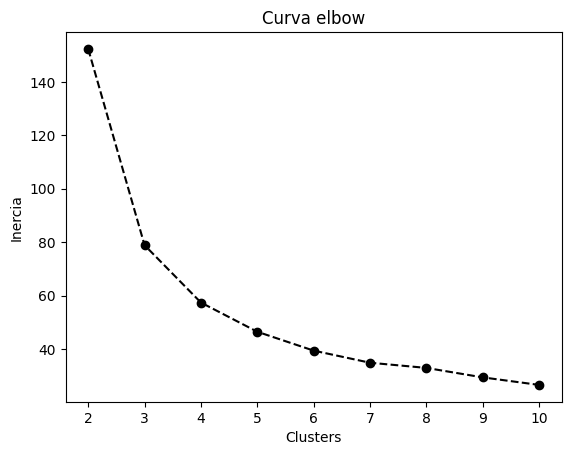

In [14]:
plt.plot(range(2,11),inercia, marker='o', linestyle='--', color='black')

plt.title("Curva elbow")
plt.ylabel('Inercia')
plt.xlabel('Clusters')
plt.show()

3 Clusters ideal

### placeholder

In [15]:
kmeans_final = KMeans(n_clusters = 3)
kmeans_final.fit(df)
clusters = kmeans_final.cluster_centers_
clusters

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [16]:
pred = kmeans_final.predict(df)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [17]:
df['Cluster'] = pred
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### Plots dos clusters

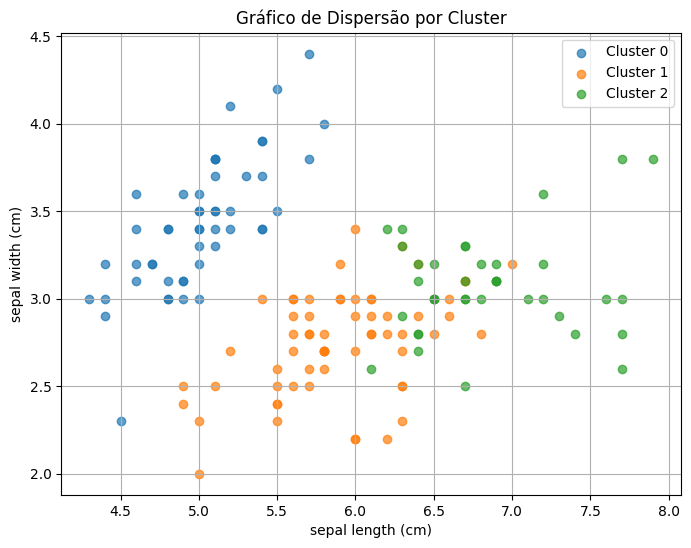

In [18]:
# Separando as colunas para o gráfico
coluna_sepal_length = df.columns[0]  # Substitua por nome da coluna do eixo X
coluna_sepal_width = df.columns[1]  # Substitua por nome da coluna do eixo Y
coluna_cluster = "Cluster"  # Substitua se o nome da coluna for diferente

# Criando o gráfico de dispersão
plt.figure(figsize=(8, 6))  # Ajuste o tamanho do gráfico se necessário

# Criando um scatter plot para cada cluster
for cluster in df[coluna_cluster].unique():
    dados_cluster = df[df[coluna_cluster] == cluster]
    plt.scatter(
        dados_cluster[coluna_sepal_length],
        dados_cluster[coluna_sepal_width],
        label=f"Cluster {cluster}",
        alpha=0.7,
    )

# Personalizando o gráfico
plt.xlabel(coluna_sepal_length)
plt.ylabel(coluna_sepal_width)
plt.title("Gráfico de Dispersão por Cluster")
plt.legend()
plt.grid(True)

# Mostrando o gráfico
plt.show()


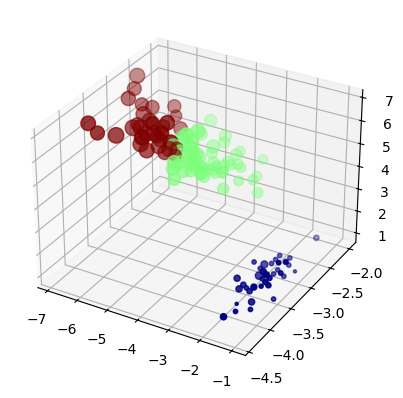

In [19]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = -df['petal length (cm)']#invertido
y = -df['sepal width (cm)']#invertido
z = df['petal length (cm)']
s = df['petal width (cm)']
c = df['Cluster']

img = ax.scatter(x, y, z, c=c, s=s*50, cmap=mpl.colormaps['jet'])
#fig.colorbar(img)
plt.show()

In [20]:
type(df['petal length (cm)'])

pandas.core.series.Series

In [21]:
df['Cluster'] = pd.to_numeric(df['Cluster'], downcast="integer")

In [22]:
df["Cluster"]

,Cluster
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,1
147,2
148,2


In [25]:
from sklearn.cluster import DBSCAN

modelo2 = DBSCAN(eps=0.5, min_samples=3)
modelo2.fit(df)

pred2 = modelo2.labels_

In [26]:
pred2

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  3,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  2,  1,  3,  1,
        3,  3,  3,  4, -1,  3, -1, -1,  3,  3,  3,  1,  1,  3,  3, -1,  4,
        1,  3,  1,  4,  1,  3,  3,  1,  1,  3,  3,  3, -1,  3,  1, -1, -1,
        3,  3,  1,  3,  3,  3,  1,  3,  3,  3,  1,  3,  3,  1])

In [23]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,0.920000
std,0.828066,0.435866,1.765298,0.762238,0.764304
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,1.750000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [24]:
df[ (df['sepal length (cm)'] < 5) ^ (df['petal length (cm)'] < 4) ]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
7,5.0,3.4,1.5,0.2,0
10,5.4,3.7,1.5,0.2,0
14,5.8,4.0,1.2,0.2,0
15,5.7,4.4,1.5,0.4,0
16,5.4,3.9,1.3,0.4,0
17,5.1,3.5,1.4,0.3,0
18,5.7,3.8,1.7,0.3,0
